In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

## Diffusion equation

$\partial_t \phi = \nabla^2 \phi$

Weak form:\
\
$\quad \int \chi \; \partial_t \phi \; \sqrt{g} \; d^2 x  =  \int \chi \; \nabla^2 \phi \; \sqrt{g} \; d^2 x = - \int \nabla \chi \; . \; \nabla \phi \; \sqrt{g} \; d^2 x$

For a triangulated surface, with $\{a,b,c\}$ as the area coordinates, such that $a+b+c=1$ and $0 \le a,b,c \le 1$, then for 1st order FEM we have,\
\
$\phi = a \; \phi_a + b \; \phi_b + c \; \phi_c$\
\
and let $\chi \in \{a,b,c\}$

$\vec{\mathbf{X}} = a \; \vec{\mathbf{X}}_a + b \; \vec{\mathbf{X}}_b + c \; \vec{\mathbf{X}}_c$\
\
where $c = 1 - a - b$

$\vec{\mathbf{t}}_a = \partial_a \vec{\mathbf{X}} = \vec{\mathbf{X}}_a - \vec{\mathbf{X}}_c$\
$\vec{\mathbf{t}}_b = \partial_b \vec{\mathbf{X}} = \vec{\mathbf{X}}_b - \vec{\mathbf{X}}_c$

$g_{ij} = \vec{\mathbf{t}}_i . \vec{\mathbf{t}}_j$\
\
$ \therefore g_{ij} = \left( \begin{matrix}
    \left(\vec{\mathbf{X}}_a - \vec{\mathbf{X}}_c\right) . \left(\vec{\mathbf{X}}_a - \vec{\mathbf{X}}_c\right)  &  \left(\vec{\mathbf{X}}_a - \vec{\mathbf{X}}_c\right) . \left(\vec{\mathbf{X}}_b - \vec{\mathbf{X}}_c\right) \\
     \left(\vec{\mathbf{X}}_a - \vec{\mathbf{X}}_c\right) . \left(\vec{\mathbf{X}}_b - \vec{\mathbf{X}}_c\right)  &  \left(\vec{\mathbf{X}}_b - \vec{\mathbf{X}}_c\right) . \left(\vec{\mathbf{X}}_b - \vec{\mathbf{X}}_c\right)
    \end{matrix} \right) 
    = \left( \begin{matrix}
    \vec{\mathbf{X}}_{ac} . \vec{\mathbf{X}}_{ac}  &  \vec{\mathbf{X}}_{ac} . \vec{\mathbf{X}}_{bc}  \\
    \vec{\mathbf{X}}_{ac} . \vec{\mathbf{X}}_{bc}  &  \vec{\mathbf{X}}_{bc} . \vec{\mathbf{X}}_{bc} 
    \end{matrix} \right)$

$\Rightarrow \; g = |\vec{\mathbf{X}}_{ac}|^2 \; |\vec{\mathbf{X}}_{bc}|^2 - \left( \vec{\mathbf{X}}_{ac} . \vec{\mathbf{X}}_{bc} \right)^2$

$g^{ij} =  \frac{1}{g}
     \left( \begin{matrix}
     \vec{\mathbf{X}}_{bc} . \vec{\mathbf{X}}_{bc}  &  -\vec{\mathbf{X}}_{ac} . \vec{\mathbf{X}}_{bc}  \\
    -\vec{\mathbf{X}}_{ac} . \vec{\mathbf{X}}_{bc}  &   \vec{\mathbf{X}}_{ac} . \vec{\mathbf{X}}_{ac} 
    \end{matrix} \right)$ 


$\int_{a=0}^{1} \; \int_{b=0}^{1-a} da \;  db = 1/2 $\
\
$\int_{a=0}^{1} \; \int_{b=0}^{1-a} a \; da \; db = 1/6 $\
\
$\int_{a=0}^{1} \; \int_{b=0}^{1-a} b \; da \; db = 1/6 $\
\
$\int_{a=0}^{1} \; \int_{b=0}^{1-a} c \; da \; db = 1/6 $

$\int_{a=0}^{1} \; \int_{b=0}^{1-a} a \; a \; da \; db =  1/12 $\
\
$\int_{a=0}^{1} \; \int_{b=0}^{1-a} a \; b \; da \; db =  1/24 $\
\
$\int_{a=0}^{1} \; \int_{b=0}^{1-a} a \; c \; da \; db =  1/24 $\
\
$\int_{a=0}^{1} \; \int_{b=0}^{1-a} c \; c \; da \; db =  1/12 $

Now, if $\chi = a, b, c$ then,\
\
$ 1/12 \; \partial_t \left( \phi_a + \phi_b / 2 + \phi_c /  2 \right)  =  - 1/2 \; [ g^{aa} \; (\phi_a - \phi_c) + g^{ab} \; (\phi_b - \phi_c) ]$\
\
$ 1/12 \; \partial_t \left( \phi_a / 2 + \phi_b + \phi_c /  2 \right)  =  - 1/2 \; [ g^{bb} \; (\phi_b - \phi_c) + g^{ba} \; (\phi_a - \phi_c) ]$\
\
$ 1/12 \; \partial_t \left( \phi_a / 2 + \phi_b / 2 + \phi_c  \right)  =    1/2 \; [ g^{aa} \; (\phi_a - \phi_c) + g^{ab} \; (\phi_b - \phi_c) + g^{bb} \; (\phi_b - \phi_c) + g^{ba} \; (\phi_a - \phi_c) ] $

$ \partial_t \phi_a = -12 \; [g^{aa} \; (\phi_a - \phi_c) + g^{ab} \; (\phi_b - \phi_c) ]$\
\
$ \partial_t \phi_b = -12 \; [g^{bb} \; (\phi_b - \phi_c) + g^{ba} \; (\phi_a - \phi_c) ]$\
\
$ \partial_t \phi_c =  12 \; [g^{aa} \; (\phi_a - \phi_c) + g^{ab} \; (\phi_b - \phi_c) + g^{bb} \; (\phi_b - \phi_c) + g^{ba} \; (\phi_a - \phi_c) ]$

# Grid generation

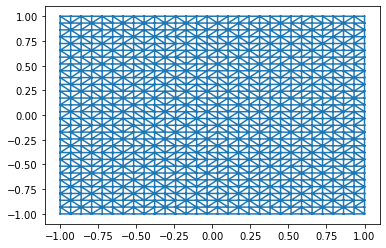

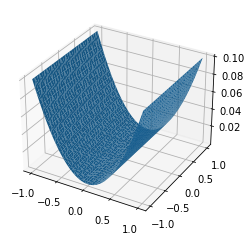

In [95]:
NxGrid = 30
NyGrid = 30

A = 0.1

# Create a grid of points
x = np.linspace(-1, 1, NxGrid)
y = np.linspace(-1, 1, NyGrid)

XGrid, YGrid = np.meshgrid(x, y)

XGrid = XGrid.flatten()
YGrid = YGrid.flatten()

ZGrid = A * XGrid**2

# Create a Delaunay triangulation
tri = Delaunay(np.array([XGrid, YGrid]).T)

plt.triplot(XGrid, YGrid, tri.simplices.copy())
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# plt.tricontourf(XGrid, YGrid, tri.simplices.copy(), ZGrid)
ax.plot_trisurf(XGrid, YGrid, tri.simplices.copy(), ZGrid)
plt.show()

To isometrically flatten the surface, we use the arc length parametrization in the X-direction:\
\
$z(x,y) = A x^2$\
\
$ \Rightarrow \; ds^2 \; = \; dx^2 + dy^2 + dz^2 \; = \; ( 1 + 4 A^2 x^2 ) \; dx^2 + dy^2$\
\
$ s \; = \; \int_{x=0}^{X} \sqrt{1 + 4 A^2 x^2 } \; dx = \frac{1}{2} \; x \; \sqrt{1 + 4 A^2 x^2} + \frac{1}{4A} \; \sinh ^{-1}(2 A x)$


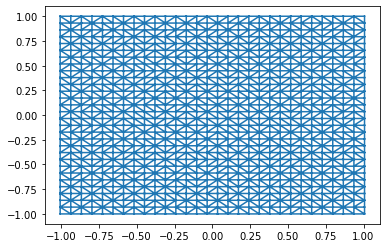

In [96]:
sGrid = 0.5 * XGrid * np.sqrt( 1 + 4 * A**2 * XGrid**2 ) + 1/(4*A) * np.arcsinh( 2 * A * XGrid )

plt.triplot(sGrid, YGrid, tri.simplices.copy())
plt.show()

$ \partial_t \phi_a = -12 \; [g^{aa} \; (\phi_a - \phi_c) + g^{ab} \; (\phi_b - \phi_c) ] = -12 \; [g^{aa} \; \phi_a + g^{ab} \; \phi_b - (g^{aa} + g^{ab}) \; \phi_c) ]$\
\
$ g^{aa} = \left( \vec{\mathbf{X}}_{bc} . \vec{\mathbf{X}}_{bc} \right) / g \;\; $  and  $ \;\; g^{ab} = - \left( \vec{\mathbf{X}}_{ac} . \vec{\mathbf{X}}_{bc} \right) / g $\
\
$ g =  \left( \vec{\mathbf{X}}_{ac} . \vec{\mathbf{X}}_{ac} \right)  \left( \vec{\mathbf{X}}_{bc} . \vec{\mathbf{X}}_{bc} \right) -  \left( \vec{\mathbf{X}}_{ab} . \vec{\mathbf{X}}_{ab} \right)  \left( \vec{\mathbf{X}}_{ab} . \vec{\mathbf{X}}_{ab} \right) $

In [97]:
NTri = tri.simplices.shape[0]
M = np.zeros( [NxGrid*NyGrid , NxGrid*NyGrid] )

for i in range(NTri):
    a = tri.simplices[i, 0]
    b = tri.simplices[i, 1]
    c = tri.simplices[i, 2]

    abc = np.array([a, b, c])

    for j in range(3):
        a,b,c = abc[j], abc[(j+1)%3], abc[(j+2)%3]

        Xab = XGrid[a] - XGrid[b]
        Yab = YGrid[a] - YGrid[b]
        Zab = ZGrid[a] - ZGrid[b]

        Xac = XGrid[a] - XGrid[c]
        Yac = YGrid[a] - YGrid[c]
        Zac = ZGrid[a] - ZGrid[c]

        Xbc = XGrid[b] - XGrid[c]
        Ybc = YGrid[b] - YGrid[c]
        Zbc = ZGrid[b] - ZGrid[c]

        g = (Xac**2+Yac**2+Zac**2) * (Xbc**2+Ybc**2+Zbc**2) - (Xab**2+Yab**2+Zab**2)**2
        gaa =  (Xbc**2+Ybc**2+Zbc**2) / g
        gab = -(Xac*Xbc+Yac*Ybc+Zac*Zbc) / g

        M[a,a] += -12 * gaa
        M[a,b] += -12 * gab
        M[a,c] +=  12 * (gaa + gab)


$ \phi_i \; \rightarrow \; \phi_i \; + \; \Delta t \; \sum_j M_{ij} \; \phi_j $

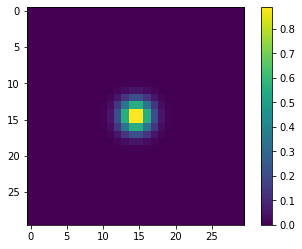

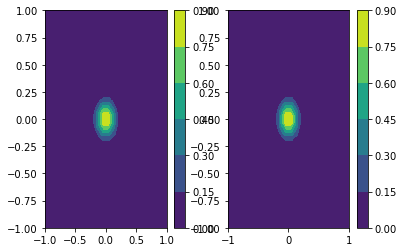

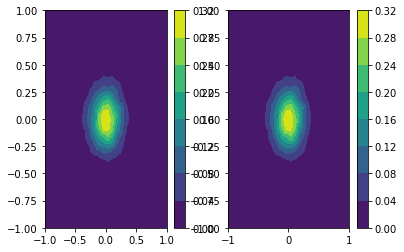

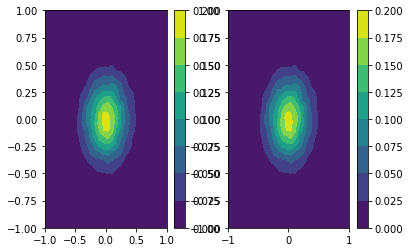

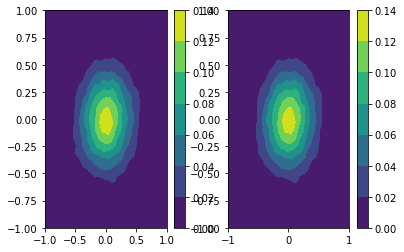

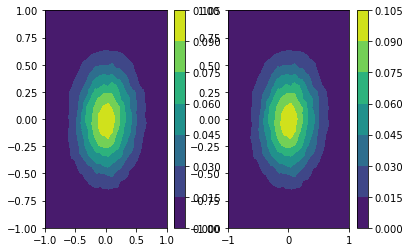

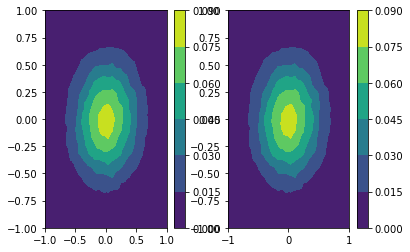

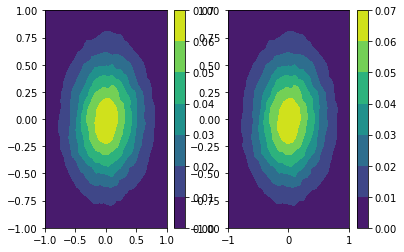

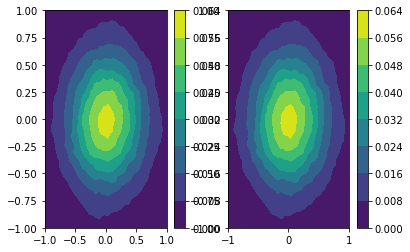

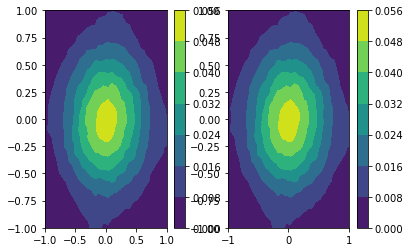

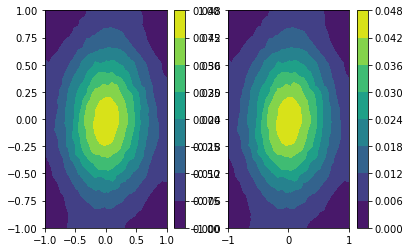

In [98]:
Sigma = 0.1
dt = 0.000001

NIteration = 10000

phi = np.exp( - (sGrid**2 + YGrid**2) / (2*Sigma**2) )

plt.imshow(phi.reshape(NxGrid, NyGrid))
plt.colorbar()
plt.show()

for i in range(NIteration):
    phi = phi + dt * np.matmul(M, phi)

    if(i%1000 == 0):
        plt.subplot(1,2,1)
        # plt.imshow(phi.reshape(NxGrid, NyGrid))
        plt.tricontourf(XGrid, YGrid, tri.simplices.copy(), phi)
        plt.colorbar()

        plt.subplot(1,2,2)
        plt.tricontourf(sGrid, YGrid, tri.simplices.copy(), phi)
        plt.colorbar()

        plt.show()